# Code 1 - Processing data and Regressions

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## II.3.1. Exploiting text files
### Transform password text files

In [2]:
def texttolist(file, expiration=False):
    f = open(file, "r")
    file = []
    for elt in f.readlines():
        [a,b]=elt.split(':', 1)
        if expiration :
            file.append([a,b[:-41]])
        else :
            file.append([a,b[:-1]])
    data = pd.DataFrame(file)
    data.columns = ['login','password']
    return data

In [3]:
fortnite = texttolist("./Fortnite 8k.txt")
fortnite['platform'] = 'fortnite'
fortnite['platform_id'] = 0+1

mail = texttolist("./Mail 161k.txt")
mail['platform'] = 'mail'
mail['platform_id'] = 1+1

minecraft = texttolist("./Minecraft 60k.txt")
minecraft['platform'] = 'minecraft'
minecraft['platform_id'] = 2+1

netflix = texttolist("./Netflix 12k.txt")
netflix['platform'] = 'netflix'
netflix['platform_id'] = 3+1

nordvpn = texttolist("./Nordvpn 633.txt", True)
nordvpn['platform'] = 'nordvpn'
nordvpn['platform_id'] = 4+1

spotify = texttolist("./Spotify 38k.txt")
spotify['platform'] = 'spotify'
spotify['platform_id'] = 5+1

steam = texttolist("./Steam 25k.txt")
steam['platform'] = 'steam'
steam['platform_id'] = 6+1

In [4]:
database = pd.concat([fortnite, mail, minecraft, netflix, nordvpn, spotify, steam], ignore_index=True)
nb_of_lines = database.shape[0]
database

,login,password,platform,platform_id
0,joindiscordserver@gmail.com,https,fortnite,1
1,joindiscordserver@gmail.com,httpsfortnite@arcor.de:1fckoeln123,fortnite,1
2,fortnite@freenet.de,tiberius,fortnite,1
3,fortnite@aliceadsl.fr,navarro,fortnite,1
4,fortnite@virgilio.it,211089,fortnite,1
...,...,...,...,...
311531,ghrb7028@nate.com,asas4598iamtherichestguy@gmail.com:gzanucuelanu,steam,7
311532,nickstuible@hotmail.com,truballa37fangfang_goofie@hotmail.com:seedldb2t22,steam,7
311533,rainnygirl_06@hotmail.com,5557754lamar@prodigy.net:anomaly,steam,7
311534,lamar@prodigy.net,navyldoret,steam,7


## II.3.2. Processing email providers
### Extracting information and adding ids

In [5]:
database['email_provider']=[(database['login'][i]).split('@', 1)[1] for i in range(nb_of_lines)]
providers, count = np.unique(database['email_provider'].values, return_counts=True)

indexes = np.argsort(count, )
providers_sort = []

for ind in indexes:
    providers_sort.append(providers[ind])
providers_sort=np.array(providers_sort[::-1])
providers_sort

array(['t-online.de', 'gmail.com', 'arcor.de', ..., 'mail.rd',
       'mail.qango.com', '0000.ru'], dtype='<U33')

In [6]:
nb_providers = (np.unique(database['email_provider'].values).shape)[0]

providers_dict = { providers_sort[i] : i+1 for i in range(nb_providers) }
email_provider_id = []
for i in range (nb_of_lines):
    email_provider_id.append(providers_dict[database['email_provider'][i]])
database['email_provider_id'] = email_provider_id
database

,login,password,platform,platform_id,email_provider,email_provider_id
0,joindiscordserver@gmail.com,https,fortnite,1,gmail.com,2
1,joindiscordserver@gmail.com,httpsfortnite@arcor.de:1fckoeln123,fortnite,1,gmail.com,2
2,fortnite@freenet.de,tiberius,fortnite,1,freenet.de,4
3,fortnite@aliceadsl.fr,navarro,fortnite,1,aliceadsl.fr,32
4,fortnite@virgilio.it,211089,fortnite,1,virgilio.it,139
...,...,...,...,...,...,...
311531,ghrb7028@nate.com,asas4598iamtherichestguy@gmail.com:gzanucuelanu,steam,7,nate.com,24
311532,nickstuible@hotmail.com,truballa37fangfang_goofie@hotmail.com:seedldb2t22,steam,7,hotmail.com,5
311533,rainnygirl_06@hotmail.com,5557754lamar@prodigy.net:anomaly,steam,7,hotmail.com,5
311534,lamar@prodigy.net,navyldoret,steam,7,prodigy.net,376


## II.3.3. Processing countries

In [7]:
ctry=[]
for i in range(nb_of_lines):
    if database['email_provider'][i].split('.', 1)[1]=='com':
        ctry.append('international')
    elif database['email_provider'][i].split('.', 1)[1]=='net':
        ctry.append('international')
    else :
        ctry.append(database['email_provider'][i].split('.', 1)[1])
database['country']=ctry

countries, ccount = np.unique(database['country'].values, return_counts=True)

indexes_country = np.argsort(ccount, )
country_sort = []

for ind in indexes_country:
    country_sort.append(countries[ind])
country_sort=np.array(country_sort[::-1])
country_sort.shape

(408,)

In [8]:
nb_countries = (np.unique(database['country'].values).shape)[0]

countries_dict = { country_sort[i] : i+1 for i in range(nb_countries) }
country_id = []
for i in range (nb_of_lines):
    country_id.append(countries_dict[database['country'][i]])
database['country_id'] = country_id
database

,login,password,platform,platform_id,email_provider,email_provider_id,country,country_id
0,joindiscordserver@gmail.com,https,fortnite,1,gmail.com,2,international,2
1,joindiscordserver@gmail.com,httpsfortnite@arcor.de:1fckoeln123,fortnite,1,gmail.com,2,international,2
2,fortnite@freenet.de,tiberius,fortnite,1,freenet.de,4,de,1
3,fortnite@aliceadsl.fr,navarro,fortnite,1,aliceadsl.fr,32,fr,3
4,fortnite@virgilio.it,211089,fortnite,1,virgilio.it,139,it,8
...,...,...,...,...,...,...,...,...
311531,ghrb7028@nate.com,asas4598iamtherichestguy@gmail.com:gzanucuelanu,steam,7,nate.com,24,international,2
311532,nickstuible@hotmail.com,truballa37fangfang_goofie@hotmail.com:seedldb2t22,steam,7,hotmail.com,5,international,2
311533,rainnygirl_06@hotmail.com,5557754lamar@prodigy.net:anomaly,steam,7,hotmail.com,5,international,2
311534,lamar@prodigy.net,navyldoret,steam,7,prodigy.net,376,international,2


## II.3.4. Adding password score and treating the different vulnerabilities
### First, calculating password scores

In [9]:
#%pip install passwordmeter
import passwordmeter

score, advice = [], []

for i in range(nb_of_lines):
    strength, improvements = passwordmeter.test(database['password'].values[i])
    score.append(strength)
    advice.append(improvements)

In [10]:
database['score'] = score
database['improvements'] = advice
database

,login,password,platform,platform_id,email_provider,email_provider_id,country,country_id,score,improvements
0,joindiscordserver@gmail.com,https,fortnite,1,gmail.com,2,international,2,0.199468,{'length': 'Increase the length of the passwor...
1,joindiscordserver@gmail.com,httpsfortnite@arcor.de:1fckoeln123,fortnite,1,gmail.com,2,international,2,0.399384,{'casemix': 'Use a good mix of UPPER case and ...
2,fortnite@freenet.de,tiberius,fortnite,1,freenet.de,4,de,1,0.111294,"{'charmix': 'Use a good mix of numbers, letter..."
3,fortnite@aliceadsl.fr,navarro,fortnite,1,aliceadsl.fr,32,fr,3,0.205783,{'length': 'Increase the length of the passwor...
4,fortnite@virgilio.it,211089,fortnite,1,virgilio.it,139,it,8,0.161860,{'length': 'Increase the length of the passwor...
...,...,...,...,...,...,...,...,...,...,...
311531,ghrb7028@nate.com,asas4598iamtherichestguy@gmail.com:gzanucuelanu,steam,7,nate.com,24,international,2,0.389583,{'variety': 'Minimize character duplicates and...
311532,nickstuible@hotmail.com,truballa37fangfang_goofie@hotmail.com:seedldb2t22,steam,7,hotmail.com,5,international,2,0.390541,{'variety': 'Minimize character duplicates and...
311533,rainnygirl_06@hotmail.com,5557754lamar@prodigy.net:anomaly,steam,7,hotmail.com,5,international,2,0.396914,{'variety': 'Minimize character duplicates and...
311534,lamar@prodigy.net,navyldoret,steam,7,prodigy.net,376,international,2,0.212807,"{'charmix': 'Use a good mix of numbers, letter..."


### Then, adding binary variables for the 6 following improvement strategies

In [11]:
dictio = database['improvements'][0].copy()
for i in range(nb_of_lines):
    dictio.update(database['improvements'][i])
dictio

{'length': 'Increase the length of the password',
 'charmix': 'Use a good mix of numbers, letters, and symbols',
 'casemix': 'Use a good mix of UPPER case and lower case letters',
 'phrase': 'Passphrases (e.g. an obfuscated sentence) are better than passwords',
 'notword': 'Avoid using one of the ten thousand most common passwords',
 'variety': 'Minimize character duplicates and repetitions'}

In [12]:
length_suggestion = []
charmix_suggestion = []
casemix_suggestion = []
phrase_suggestion = []
notword_suggestion = []
variety_suggestion = []

for i in range(nb_of_lines):
    if 'length' in database['improvements'][i]:
        length_suggestion.append(1)
    else :
        length_suggestion.append(0)
    if 'charmix' in database['improvements'][i]:
        charmix_suggestion.append(1)
    else :
        charmix_suggestion.append(0)
    if 'casemix' in database['improvements'][i]:
        casemix_suggestion.append(1)
    else :
        casemix_suggestion.append(0)
    if 'phrase' in database['improvements'][i]:
        phrase_suggestion.append(1)
    else :
        phrase_suggestion.append(0)
    if 'notword' in database['improvements'][i]:
        notword_suggestion.append(1)
    else :
        notword_suggestion.append(0)
    if 'variety' in database['improvements'][i]:
        variety_suggestion.append(1)
    else :
        variety_suggestion.append(0)
        
database['length_suggestion'] = length_suggestion
database['charmix_suggestion'] = charmix_suggestion
database['casemix_suggestion'] = casemix_suggestion
database['phrase_suggestion'] = phrase_suggestion
database['notword_suggestion'] = notword_suggestion
database['variety_suggestion'] = variety_suggestion

In [13]:
database

,login,password,platform,platform_id,email_provider,email_provider_id,country,country_id,score,improvements,length_suggestion,charmix_suggestion,casemix_suggestion,phrase_suggestion,notword_suggestion,variety_suggestion
0,joindiscordserver@gmail.com,https,fortnite,1,gmail.com,2,international,2,0.199468,{'length': 'Increase the length of the passwor...,1,1,1,1,0,0
1,joindiscordserver@gmail.com,httpsfortnite@arcor.de:1fckoeln123,fortnite,1,gmail.com,2,international,2,0.399384,{'casemix': 'Use a good mix of UPPER case and ...,0,0,1,1,0,0
2,fortnite@freenet.de,tiberius,fortnite,1,freenet.de,4,de,1,0.111294,"{'charmix': 'Use a good mix of numbers, letter...",0,1,1,1,1,0
3,fortnite@aliceadsl.fr,navarro,fortnite,1,aliceadsl.fr,32,fr,3,0.205783,{'length': 'Increase the length of the passwor...,1,1,1,1,0,0
4,fortnite@virgilio.it,211089,fortnite,1,virgilio.it,139,it,8,0.161860,{'length': 'Increase the length of the passwor...,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311531,ghrb7028@nate.com,asas4598iamtherichestguy@gmail.com:gzanucuelanu,steam,7,nate.com,24,international,2,0.389583,{'variety': 'Minimize character duplicates and...,0,0,1,1,0,1
311532,nickstuible@hotmail.com,truballa37fangfang_goofie@hotmail.com:seedldb2t22,steam,7,hotmail.com,5,international,2,0.390541,{'variety': 'Minimize character duplicates and...,0,0,1,1,0,1
311533,rainnygirl_06@hotmail.com,5557754lamar@prodigy.net:anomaly,steam,7,hotmail.com,5,international,2,0.396914,{'variety': 'Minimize character duplicates and...,0,0,1,1,0,1
311534,lamar@prodigy.net,navyldoret,steam,7,prodigy.net,376,international,2,0.212807,"{'charmix': 'Use a good mix of numbers, letter...",0,1,1,1,0,0


## V.1. Régression score-plateforme

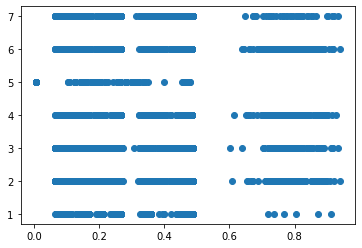

There seems to be no correlation except for platform 5 (NordVPN), where the scores are very low. 


In [14]:
plt.plot(database['score'], database['platform_id'], 'o')
plt.show()
print('There seems to be no correlation except for platform 5 (NordVPN), where the scores are very low. ')

### Création des variables binaires


In [15]:
fortnite_bin = []
mail_bin = []
minecraft_bin = []
netflix_bin = []
nordvpn_bin = []
spotify_bin = []
steam_bin = []

for i in range(nb_of_lines):
    if 'fortnite' in database['platform'][i]:
        fortnite_bin.append(1)
    else :
        fortnite_bin.append(0)
    if 'mail' in database['platform'][i]:
        mail_bin.append(1)
    else :
        mail_bin.append(0)
    if 'minecraft' in database['platform'][i]:
        minecraft_bin.append(1)
    else :
        minecraft_bin.append(0)
    if 'netflix' in database['platform'][i]:
        netflix_bin.append(1)
    else :
        netflix_bin.append(0)
    if 'nordvpn' in database['platform'][i]:
        nordvpn_bin.append(1)
    else :
        nordvpn_bin.append(0)
    if 'spotify' in database['platform'][i]:
        spotify_bin.append(1)
    else :
        spotify_bin.append(0)
    if 'steam' in database['platform'][i]:
        steam_bin.append(1)
    else :
        steam_bin.append(0)
        
database['fortnite_bin'] = fortnite_bin
database['mail_bin'] = mail_bin
database['minecraft_bin'] = minecraft_bin
database['netflix_bin'] = netflix_bin
database['nordvpn_bin'] = nordvpn_bin
database['spotify_bin'] = spotify_bin
database['steam_bin'] = steam_bin

#Variable binaire
X = np.zeros((311536, 7))
X[:,0] = fortnite_bin
X[:,1] = mail_bin
X[:,2] = minecraft_bin
X[:,3] = netflix_bin
X[:,4] = nordvpn_bin
X[:,5] = spotify_bin
X[:,6] = steam_bin
X

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [16]:
import statsmodels.api as sm
Y = database['score']
model_bin = sm.OLS(Y, X).fit()
pred_bin = model_bin.predict(X)

model_bin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     708.7
Date:                Sun, 29 Mar 2020   Prob (F-statistic):               0.00
Time:                        22:31:53   Log-Likelihood:             2.7678e+05
No. Observations:              311536   AIC:                        -5.536e+05
Df Residuals:                  311529   BIC:                        -5.535e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2723      0.001    257.120      0.000       0.270       0.274
x2             0.2670      0.000   1077.057      0.000       0.267       0.268
x3             0.2611      0.000    659.819      0.000       0.260       0.262
x4             0.2824      0.001    326.357      0.000       0.281       0.284
x5             0.1171      0.004     29.357      0.000       0.109       0.125
x6             0.2919      0.001    580.342      0.000       0.291       0.293
x7             0.2736      0.001    437.509      0.000       0.272       0.275
==============================================================================
Omnibus:                    48025.198   Durbin-Watson:                   1.661
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            78998.732
Skew:                           1.046   Prob(JB):                         0.00
Kurtosis:                       4.307   Cond. No.                         16.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
## Regression OLS score en fonction de la plateforme
import statsmodels.api as sm
X = database['score']
y = database['platform_id']
model = sm.OLS(y, X).fit()
predictions= model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            platform_id   R-squared (uncentered):                   0.690
Model:                            OLS   Adj. R-squared (uncentered):              0.690
Method:                 Least Squares   F-statistic:                          6.936e+05
Date:                Sun, 29 Mar 2020   Prob (F-statistic):                        0.00
Time:                        22:32:01   Log-Likelihood:                     -6.6105e+05
No. Observations:              311536   AIC:                                  1.322e+06
Df Residuals:                  311535   BIC:                                  1.322e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
score         10.4649      0.013    832.849      0.000      10.440      10.490
==============================================================================
Omnibus:                    17266.366   Durbin-Watson:                   0.442
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20306.890
Skew:                           0.624   Prob(JB):                         0.00
Kurtosis:                       3.090   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

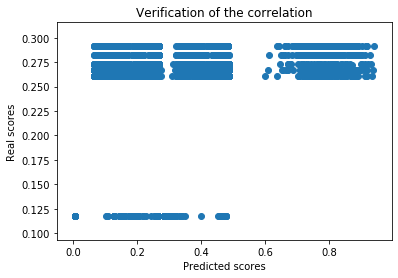

In [19]:
score_prov = database['score'].to_numpy()
plt.scatter(database['score'], pred_bin)
plt.xlabel('Predicted scores')
plt.ylabel('Real scores')
plt.title('Verification of the correlation')
plt.show()

## V.2. Régression score - email provider 

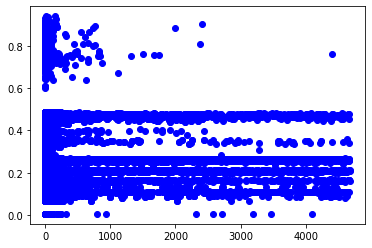

There seems to be no correlation between the email provider and the score


In [20]:
plt.plot(database['email_provider_id'], database['score'], 'b o')
plt.show()
print('There seems to be no correlation between the email provider and the score')

### Variables binaires email provider
t-online.de <br>
gmail.com <br>
arcor.de <br>
freenet.de <br>
hotmail.com <br>
wanadoo.fr <br>
mail.ru <br>
interia.pl <br>
free.fr <br>
web.de <br>
yahoo.com <br>
orange.fr <br>
aol.com <br>
yandex.ru <br>

In [21]:
#Variable binaire

tonline_bin = []
gmail_bin = []
arcor_bin = []
freenet_bin = []
hotmail_bin = []
wanadoo_bin = []
mail_bin = []
interia_bin = []
free_bin = []
web_bin = []
yahoo_bin = []
orange_bin = []
aol_bin = []
yandex_bin = []
littleprovider_bin = []

for i in range(nb_of_lines):
    taken = False
    if 'gmail.com' in database['email_provider'][i]:
        gmail_bin.append(1)
    else :
        gmail_bin.append(0)
    if 't_online.de' in database['email_provider'][i]:
        tonline_bin.append(1)
    else :
        tonline_bin.append(0)
    if 'arcor.de' in database['email_provider'][i]:
        arcor_bin.append(1)
    else :
        arcor_bin.append(0)
    if 'freenet.de' in database['email_provider'][i]:
        freenet_bin.append(1)
    else :
        freenet_bin.append(0)
    if 'hotmail.com' in database['email_provider'][i]:
        hotmail_bin.append(1)
    else :
        hotmail_bin.append(0)
    if 'wanadoo.fr' in database['email_provider'][i]:
        wanadoo_bin.append(1)
    else :
        wanadoo_bin.append(0)
    if 'mail.ru' in database['email_provider'][i]:
        mail_bin.append(1)
    else :
        mail_bin.append(0)
    if 'interia.pl' in database['email_provider'][i]:
        interia_bin.append(1)
    else :
        interia_bin.append(0)
    if 'free.fr' in database['email_provider'][i]:
        free_bin.append(1)
    else :
        free_bin.append(0)
    if 'web.de' in database['email_provider'][i]:
        web_bin.append(1)
    else :
        web_bin.append(0)
    if 'yahoo.com' in database['email_provider'][i]:
        yahoo_bin.append(1)
    else :
        yahoo_bin.append(0)
    if 'orange.fr' in database['email_provider'][i]:
        orange_bin.append(1)
    else :
        orange_bin.append(0)
    if 'aol.com' in database['email_provider'][i]:
        aol_bin.append(1)
    else :
        aol_bin.append(0)
    if 'yandex.ru' in database['email_provider'][i]:
        yandex_bin.append(1)
    else :
        yandex_bin.append(0)
    if not taken : 
        littleprovider_bin.append(1)
    else :
        littleprovider_bin.append(0)
        

#Création de la variable binaire 
Xmail = np.zeros((311536, 15))
Xmail[:,0] = tonline_bin
Xmail[:,1] = gmail_bin
Xmail[:,2] = arcor_bin
Xmail[:,3] = freenet_bin
Xmail[:,4] = hotmail_bin
Xmail[:,5] = wanadoo_bin
Xmail[:,6] = mail_bin
Xmail[:,7] = interia_bin
Xmail[:,8]= free_bin
Xmail[:,9]= web_bin
Xmail[:,10]= yahoo_bin
Xmail[:,11]= orange_bin
Xmail[:,12]= aol_bin
Xmail[:,13]= yandex_bin
Xmail[:,14] = littleprovider_bin
Xmail

array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [22]:
#Regression 
Y = database['score']
model_mail = sm.OLS(Y, Xmail).fit()
pred_mail = model_mail.predict(Xmail)
model_mail.summary()

/Users/ruilapuskas/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/Users/ruilapuskas/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/ruilapuskas/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/ruilapuskas/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/ruilapuskas/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     977.2
Date:                Sun, 29 Mar 2020   Prob (F-statistic):               0.00
Time:                        22:33:04   Log-Likelihood:             2.8090e+05
No. Observations:              311536   AIC:                        -5.618e+05
Df Residuals:                  311522   BIC:                        -5.616e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const               0          0        nan        nan           0           0
x1             0.0180      0.001     28.355      0.000       0.017       0.019
x2            -0.0425      0.001    -60.760      0.000      -0.044      -0.041
x3            -0.0355      0.001    -45.582      0.000      -0.037      -0.034
x4            -0.0165      0.001    -18.994      0.000      -0.018      -0.015
x5            -0.0250      0.001    -27.124      0.000      -0.027      -0.023
x6            -0.0173      0.001    -16.289      0.000      -0.019      -0.015
x7            -0.0273      0.001    -25.160      0.000      -0.029      -0.025
x8            -0.0697      0.001    -61.237      0.000      -0.072      -0.067
x9            -0.0124      0.001    -10.895      0.000      -0.015      -0.010
x10            0.0143      0.001     12.458      0.000       0.012       0.016
x11            0.0172      0.001     14.257      0.000       0.015       0.020
x12           -0.0377      0.001    -25.880      0.000      -0.041      -0.035
x13           -0.0321      0.002    -21.324      0.000      -0.035      -0.029
x14            0.2788      0.000   1136.011      0.000       0.278       0.279
==============================================================================
Omnibus:                    47870.574   Durbin-Watson:                   1.688
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80386.574
Skew:                           1.029   Prob(JB):                         0.00
Kurtosis:                       4.398   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

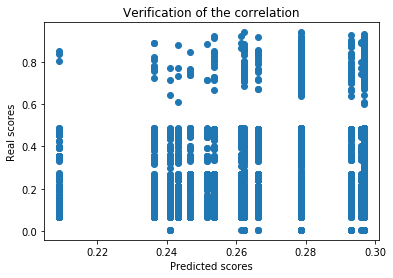

In [23]:
#variables à afficher
pred_mail
score_mail = database['score'].to_numpy()

#Affichage
mpl.rcParams['agg.path.chunksize'] = 100000
plt.plot(pred_mail, score_mail, 'o')
plt.xlabel('Predicted scores')
plt.ylabel('Real scores')
plt.title('Verification of the correlation')
plt.show()

## V.3. GDP Regression

-0.12128969664601175
intercept:  0.26276551626840394
coef: [-1.25464548e-15]


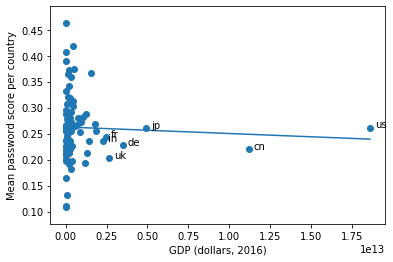

In [25]:

countries_df = pd.read_csv("./countries.csv")
gdp_df = pd.read_csv("./gdp.csv")

# We take only latest record (2016)

gdp_df = gdp_df[gdp_df['Year'] == 2016]

domain_gdp = dict()

for i, row in gdp_df.iterrows():
    try:
        # We match GDP and TLD extension by alpha3 code
        country = countries_df.loc[countries_df['alpha3_code'] == row["Country Code"]].iloc[0]
    except:
        continue
    domain_gdp[country["tld_extension"]] = row['Value']

database_except_international = database[database['country'] != 'international']
score_by_country = database[['country', 'score']].groupby(['country']).mean()

gdp = []
scores = []
labels = []

for row in score_by_country.itertuples():
    if "." in row.Index:
        country_extension = row.Index.split(".")[-1].lower()
    else:
        country_extension = row.Index

    country_score = row.score

    # Some extension do not have corresponding countries (eg: .com)

    try:
        country_gdp = domain_gdp["." + country_extension]
    except:
        continue

    if country_extension in labels:
        index = labels.index(country_extension)
        scores[index] = (scores[index] + country_score) / 2
    else:
        gdp.append(country_gdp)
        scores.append(country_score)
        labels.append(country_extension)

# Plotting

fig, ax = plt.subplots()

ax.scatter(gdp, scores)
plt.xlabel("GDP (dollars, 2016)")
plt.ylabel("Mean password score per country")

# Regression

gdp = np.asarray(gdp).reshape(-1, 1)
scores = np.asarray(scores)

regression = LinearRegression()
regression.fit(gdp, scores)

print(r2_score(gdp, scores))
plt.plot((0, max(gdp)), (regression.intercept_, regression.intercept_ + max(gdp) * regression.coef_[0]))

print("intercept: ", regression.intercept_)
print("coef:", regression.coef_)

for i, txt in enumerate(labels):
    if gdp[i] > 0.2e13:
        ax.annotate(txt, (gdp[i] + 3e11, scores[i]))

plt.show()



## V. 4. HDI Regression


intercept:  0.20816467103170352
coef: [0.06574419]
-21.785442717753874


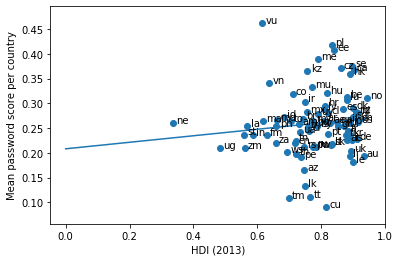

In [26]:
hdi_df = pd.read_csv("./hdi.csv")

# We take only latest record (2016)

hdi_df = hdi_df[hdi_df['year'] == 2013]

domain_hdi = dict()

for i, row in hdi_df.iterrows():
    try:
        # We match GDP and TLD extension by alpha3 code
        country = countries_df.loc[countries_df['alpha3_code'] == row["country_code"]].iloc[0]
    except:
        continue
    domain_hdi[country["tld_extension"]] = row['value']

database_except_international = database[database['country'] != 'international']
score_by_country = database[['country', 'score']].groupby(['country']).mean()

hdi = []
scores = []
labels = []

for row in score_by_country.itertuples():
    if "." in row.Index:
        country_extension = row.Index.split(".")[-1].lower()
    else:
        country_extension = row.Index

    country_score = row.score

    # Some extension do not have corresponding countries (eg: .com)

    try:
        country_hdi = domain_hdi["." + country_extension]
    except:
        continue

    if country_extension in labels:
        index = labels.index(country_extension)
        scores[index] = (scores[index] + country_score) / 2
    else:
        hdi.append(country_hdi)
        scores.append(country_score)
        labels.append(country_extension)

# Plotting

fig, ax = plt.subplots()

ax.scatter(hdi, scores)
plt.xlabel("HDI (2013)")
plt.ylabel("Mean password score per country")

# Regression

hdi = np.asarray(hdi).reshape(-1, 1)
scores = np.asarray(scores)

regression = LinearRegression()
regression.fit(hdi, scores)

plt.plot((0, max(hdi)), (regression.intercept_, regression.intercept_ + max(hdi) * regression.coef_[0]))

print("intercept: ", regression.intercept_)
print("coef:", regression.coef_)

print(r2_score(hdi, scores))

for i, txt in enumerate(labels):
    ax.annotate(txt, (hdi[i] + 0.01, scores[i]))
plt.show()



## II.3.5. Discrete score and time to crack

In [27]:
#%pip install zxcvbn
from zxcvbn import zxcvbn

score1_4 = []
time_to_crack = []
nb_guesses_to_crack = []
suggestion = []

for i in range(311536):
    if database['password'].values[i]!='':
        results = zxcvbn(database['password'].values[i])
        score1_4.append(results['score'])
        time_to_crack.append(results['crack_times_seconds']['offline_fast_hashing_1e10_per_second'])
        nb_guesses_to_crack.append(results['guesses'])
        suggestion.append(results['feedback']['suggestions'])
    else :
        score1_4.append(0)
        time_to_crack.append(0)
        nb_guesses_to_crack.append(0)
        suggestion.append('')

In [28]:
database['score1_4'] = score1_4
database['time_to_crack'] = time_to_crack
database['nb_guesses_to_crack'] = nb_guesses_to_crack
database['suggestion'] = suggestion

In [29]:
database

,login,password,platform,platform_id,email_provider,email_provider_id,country,country_id,score,improvements,...,mail_bin,minecraft_bin,netflix_bin,nordvpn_bin,spotify_bin,steam_bin,score1_4,time_to_crack,nb_guesses_to_crack,suggestion
0,joindiscordserver@gmail.com,https,fortnite,1,gmail.com,2,international,2,0.199468,{'length': 'Increase the length of the passwor...,...,0,0,0,0,0,0,0,2.2E-9,22,[Add another word or two. Uncommon words are b...
1,joindiscordserver@gmail.com,httpsfortnite@arcor.de:1fckoeln123,fortnite,1,gmail.com,2,international,2,0.399384,{'casemix': 'Use a good mix of UPPER case and ...,...,0,0,0,0,0,0,4,3.00000000000000001E+19,3.000000000000000010000000000E+29,[]
2,fortnite@freenet.de,tiberius,fortnite,1,freenet.de,4,de,1,0.111294,"{'charmix': 'Use a good mix of numbers, letter...",...,0,0,0,0,0,0,1,2.817E-7,2817,[Add another word or two. Uncommon words are b...
3,fortnite@aliceadsl.fr,navarro,fortnite,1,aliceadsl.fr,32,fr,3,0.205783,{'length': 'Increase the length of the passwor...,...,0,0,0,0,0,0,0,5.25E-8,525,[Add another word or two. Uncommon words are b...
4,fortnite@virgilio.it,211089,fortnite,1,virgilio.it,139,it,8,0.161860,{'length': 'Increase the length of the passwor...,...,0,0,0,0,0,0,1,0.0000010221,10221,[Add another word or two. Uncommon words are b...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311531,ghrb7028@nate.com,asas4598iamtherichestguy@gmail.com:gzanucuelanu,steam,7,nate.com,24,international,2,0.389583,{'variety': 'Minimize character duplicates and...,...,0,0,0,0,0,1,4,1.2142008000000000000001E+32,1.214200800000000000000100000E+42,[]
311532,nickstuible@hotmail.com,truballa37fangfang_goofie@hotmail.com:seedldb2t22,steam,7,hotmail.com,5,international,2,0.390541,{'variety': 'Minimize character duplicates and...,...,0,0,0,0,0,1,4,4.20735600000000000E+34,4.207356000000000000000000000E+44,[]
311533,rainnygirl_06@hotmail.com,5557754lamar@prodigy.net:anomaly,steam,7,hotmail.com,5,international,2,0.396914,{'variety': 'Minimize character duplicates and...,...,0,0,0,0,0,1,4,3723419133136000,37234191331360000000000000,[]
311534,lamar@prodigy.net,navyldoret,steam,7,prodigy.net,376,international,2,0.212807,"{'charmix': 'Use a good mix of numbers, letter...",...,0,0,0,0,0,1,3,0.119001,1190010000,[]


In [30]:
#Exemple de toutes les données disponibles avec le module
#On pourra parler des différentes méthodes de crack de password ultérieurement
zxcvbn(database['password'].values[1])

{'password': 'httpsfortnite@arcor.de:1fckoeln123',
 'guesses': Decimal('3.000000000000000010000000000E+29'),
 'guesses_log10': 29.477121254719663,
 'sequence': [{'pattern': 'dictionary',
   'i': 0,
   'j': 4,
   'token': 'https',
   'matched_word': 'https',
   'rank': 21,
   'dictionary_name': 'english_wikipedia',
   'reversed': False,
   'l33t': False,
   'base_guesses': 21,
   'uppercase_variations': 1,
   'l33t_variations': 1,
   'guesses': 50,
   'guesses_log10': 1.6989700043360185},
  {'pattern': 'dictionary',
   'i': 5,
   'j': 7,
   'token': 'for',
   'matched_word': 'for',
   'rank': 7,
   'dictionary_name': 'english_wikipedia',
   'reversed': False,
   'l33t': False,
   'base_guesses': 7,
   'uppercase_variations': 1,
   'l33t_variations': 1,
   'guesses': 50,
   'guesses_log10': 1.6989700043360185},
  {'pattern': 'bruteforce',
   'token': 'tnite@arcor.de:1fckoeln',
   'i': 8,
   'j': 30,
   'guesses': 100000000000000000000000,
   'guesses_log10': 22.999999999999996},
  {'patt

## II.3.6. Exporting to csv

In [31]:
database.to_csv('./database.csv', index=False)

In [32]:
database.head()

,login,password,platform,platform_id,email_provider,email_provider_id,country,country_id,score,improvements,...,mail_bin,minecraft_bin,netflix_bin,nordvpn_bin,spotify_bin,steam_bin,score1_4,time_to_crack,nb_guesses_to_crack,suggestion
0,joindiscordserver@gmail.com,https,fortnite,1,gmail.com,2,international,2,0.199468,{'length': 'Increase the length of the passwor...,...,0,0,0,0,0,0,0,2.2E-9,22,[Add another word or two. Uncommon words are b...
1,joindiscordserver@gmail.com,httpsfortnite@arcor.de:1fckoeln123,fortnite,1,gmail.com,2,international,2,0.399384,{'casemix': 'Use a good mix of UPPER case and ...,...,0,0,0,0,0,0,4,3.00000000000000001E+19,3.000000000000000010000000000E+29,[]
2,fortnite@freenet.de,tiberius,fortnite,1,freenet.de,4,de,1,0.111294,"{'charmix': 'Use a good mix of numbers, letter...",...,0,0,0,0,0,0,1,2.817E-7,2817,[Add another word or two. Uncommon words are b...
3,fortnite@aliceadsl.fr,navarro,fortnite,1,aliceadsl.fr,32,fr,3,0.205783,{'length': 'Increase the length of the passwor...,...,0,0,0,0,0,0,0,5.25E-8,525,[Add another word or two. Uncommon words are b...
4,fortnite@virgilio.it,211089,fortnite,1,virgilio.it,139,it,8,0.161860,{'length': 'Increase the length of the passwor...,...,0,0,0,0,0,0,1,0.0000010221,10221,[Add another word or two. Uncommon words are b...


In [33]:
country_sort[:25].reshape(-1,1)


array([['de'],
       ['international'],
       ['fr'],
       ['ru'],
       ['pl'],
       ['co.uk'],
       ['com.br'],
       ['it'],
       ['fm'],
       ['ca'],
       ['nl'],
       ['eu'],
       ['se'],
       ['hu'],
       ['ua'],
       ['ch'],
       ['cz'],
       ['bg'],
       ['at'],
       ['dk'],
       ['es'],
       ['by'],
       ['be'],
       ['edu'],
       ['fi']], dtype='<U18')